In [623]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from math import pi
from numpy import sin
from numpy import cos
from numpy import sqrt
from scipy import special
from numpy import exp
from scipy import optimize
from numpy import log

In [252]:
t1 = 1/2
t2 = 1/2/sqrt(2.0)
t3 = 1/2/sqrt(3.0)
num = 1000

In [253]:
def ellipf1(x,k):
    return (1-(k**2 * (sin(x)**2))) ** (-1/2)
def midpoint_1(k):
    integral_value = 0.0
    startpoint = 0.0
    endpoint = pi/2
    interval = endpoint / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += ellipf1(midpoint,k) * interval
        midpoint += interval
    return integral_value

In [254]:
def oned(x):
    return 1/pi * 1/sqrt(4*(t1**2)-x**2)

def twod(x):
    k = sqrt(1-x**2/((4*t2)**2))
    return 1/(2*(pi**2)*t2) * midpoint_1(k)

def threed(x):
    startpoint = -1*pi
    endpoint = pi
    integral_value = np.zeros(len(x))
    delphi = 0.01
    phival = np.arange(startpoint, endpoint, delphi)
    for i in range(num):
        for j in range(len(phival)):
            
            cosphi = cos(phival[j])
            if (cosphi >= max(-1, -2-x[i]/(2*t3))) and (cosphi <= min(1, 2-x[i]/(2*t3))):
                nmrt = x[i] + 2 * t3 * cos(phival[j])
                dmnt = 4 * t3
                whole = float(nmrt) / float(dmnt)
                k = sqrt(1-(whole ** 2))
                integral_value[i] += delphi * midpoint_1(k)
            
    return 1/(4*(pi**3)*t3) * integral_value 

def infd(x):
    return exp(-1*(x**2))/sqrt(pi)

In [255]:
input2 = np.linspace(-2,2,num)
d2 = twod(input2)
d3 = threed(input2)
dinf = infd(input2)

C:\Users\luoge\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


In [336]:
input1 = np.linspace(-0.95,0.95,num)
d1 = oned(input1)

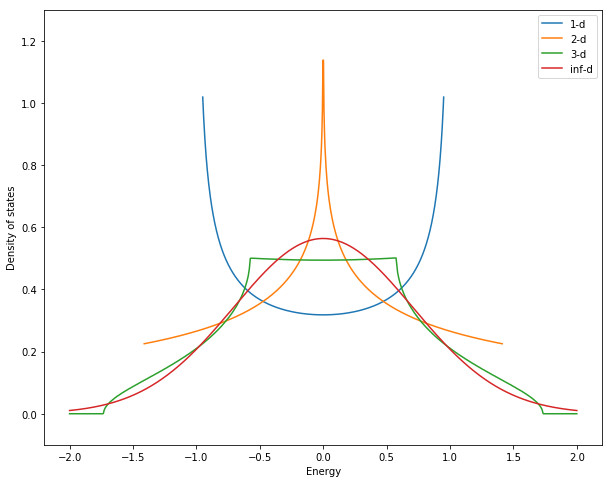

In [338]:
plt.figure(figsize = (10, 8))
plt.ylabel('Density of states')
plt.xlabel('Energy')
plt.ylim(-0.1, 1.3)
plt.plot(input1, d1, label = '1-d')
plt.plot(input2, d2, label = '2-d')
plt.plot(input2, d3, label = '3-d')
plt.plot(input2, dinf, label = 'inf-d')
plt.legend()
plt.show()

In [264]:
def bethe(x):
    return sqrt(4-x ** 2)/(2*pi)

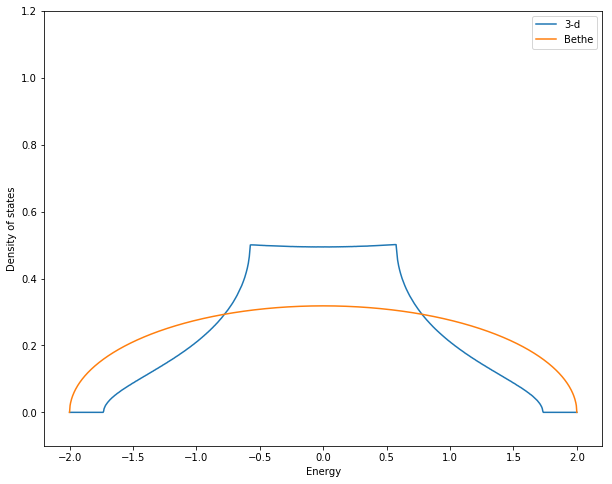

In [267]:
dbethe = bethe(input2)
plt.figure(figsize = (10, 8))
plt.ylabel('Density of states')
plt.xlabel('Energy')
plt.ylim(-0.1, 1.2)
plt.plot(input2, d3, label = '3-d')
plt.plot(input2, dbethe, label = 'Bethe')
plt.legend()
plt.show()

In [730]:
def mu1d(x):
    global T1
    e = np.linspace(-0.95,0.95,num)
    integral_value = 0.0
    startpoint = -0.95
    endpoint = 0.95
    interval = (endpoint - startpoint) / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += 1/(1+exp((e[i]-x)/T1)) * interval * d1[i]
        midpoint += interval
    return 2.0 * integral_value - 0.5
mu1dlist = []
T1 = 0.1
for i in range(num):
    sol = optimize.root(mu1d,0)
    mu1dlist.append(sol.x)
    T1 += 0.0049

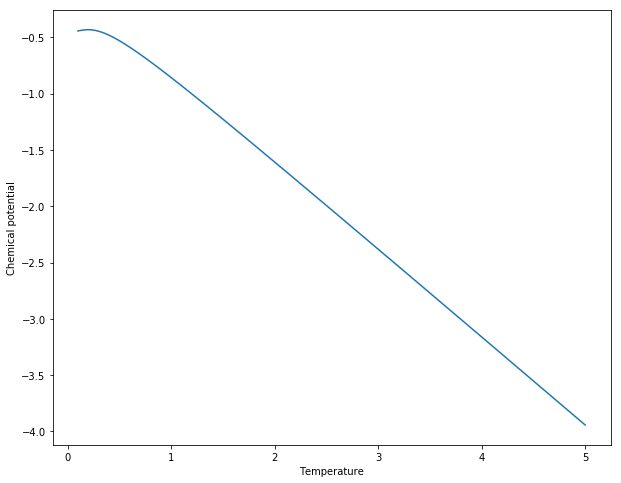

In [731]:
Trange = np.linspace(0.1,5,num)
plt.figure(figsize = (10, 8))
plt.ylabel('Chemical potential')
plt.xlabel('Temperature')
#plt.ylim(-0.1, 1.2)
plt.plot(Trange, mu1dlist)
plt.show()

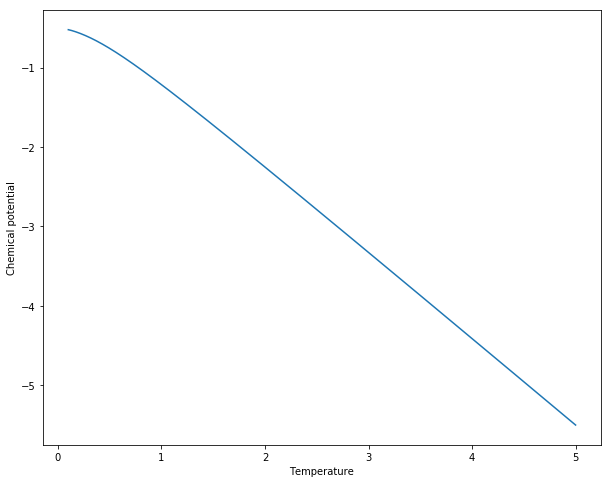

In [732]:
def mu2d(x):
    global T2
    e = np.linspace(-2.0,2.0,num)
    integral_value = 0.0
    startpoint = -2.0
    endpoint = 2.0
    interval = (endpoint - startpoint) / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += 1/(1+exp((e[i]-x)/T2)) * interval * d2[i]
        midpoint += interval
    return 2.0 * integral_value - 0.5

mu2dlist = []
T2 = 0.1
for i in range(num):
    sol = optimize.root(mu2d,0)
    mu2dlist.append(sol.x)
    T2 += 0.0049
    
Trange = np.linspace(0.1,5,num)
plt.figure(figsize = (10, 8))
plt.ylabel('Chemical potential')
plt.xlabel('Temperature')
#plt.ylim(-0.1, 1.2)
plt.plot(Trange, mu2dlist)
plt.show()

In [733]:
def mu3d(x):
    global T3
    e = np.linspace(-2.0,2.0,num)
    integral_value = 0.0
    startpoint = -2.0
    endpoint = 2.0    
    interval = (endpoint - startpoint) / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += 1/(1+exp((e[i]-x)/T3)) * interval * d3[i]
        midpoint += interval
    return 2.0 * integral_value - 0.5
mu3dlist = []
T3 = 0.1
for i in range(num):
    sol = optimize.root(mu3d,0)
    mu3dlist.append(sol.x)
    T3 += 0.0049

In [734]:
def muinfd(x):
    global T4
    e = np.linspace(-2.0,2.0,num)
    integral_value = 0.0
    startpoint = -2.0
    endpoint = 2.0    
    interval = (endpoint - startpoint) / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += 1/(1+exp((e[i]-x)/T4)) * interval * dinf[i]
        midpoint += interval
    return 2.0 * integral_value - 0.5
muinfdlist = []
T4 = 0.1
for i in range(num):
    sol = optimize.root(muinfd,0)
    muinfdlist.append(sol.x)
    T3 += 0.0049

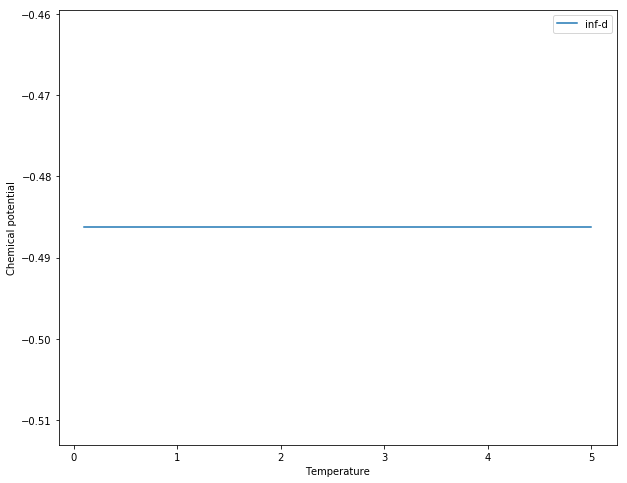

In [735]:
plt.figure(figsize = (10, 8))
plt.ylabel('Chemical potential')
plt.xlabel('Temperature')
#plt.ylim(-0.1, 1.2)
plt.plot(Trange, muinfdlist, label = 'inf-d')
plt.legend()
plt.show()

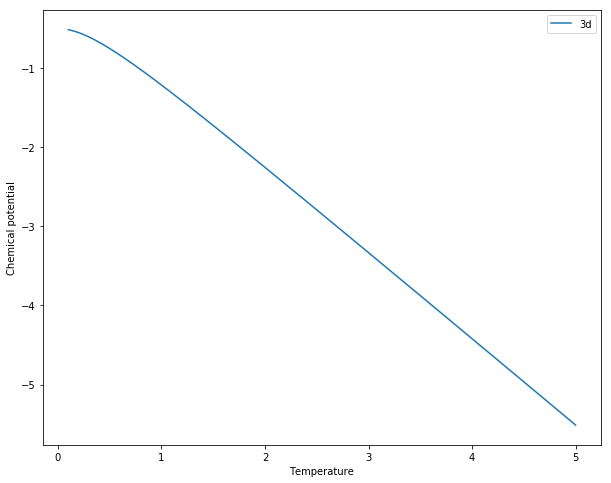

In [736]:
Trange = np.linspace(0.1,5,num)
plt.figure(figsize = (10, 8))
plt.ylabel('Chemical potential')
plt.xlabel('Temperature')
#plt.ylim(-0.1, 1.2)
plt.plot(Trange, mu3dlist, label = '3d')
#plt.plot(Trange, mu2dlist, label = '2d')
#plt.plot(Trange, mu1dlist, label = '1d')
plt.legend()
plt.show()

In [737]:
def itn1d(T):
    e = np.linspace(-0.95,0.95,num)
    integral_value = 0.0
    startpoint = -0.95
    endpoint = 0.95
    interval = (endpoint - startpoint) / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += 1/(1+exp((e[i]-mu1dlist[i])/T)) * interval * d1[i] * e[i]
        midpoint += interval
    return 2.0 * integral_value

def itn2d(T):
    e = np.linspace(-2.0,2.0,num)
    integral_value = 0.0
    startpoint = -2.0
    endpoint = 2.0
    interval = (endpoint - startpoint) / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += 1/(1+exp((e[i]-mu2dlist[i])/T)) * interval * d2[i] * e[i]
        midpoint += interval
    return 2.0 * integral_value

def itn3d(T):
    e = np.linspace(-2.0,2.0,num)
    integral_value = 0.0
    startpoint = -2.0
    endpoint = 2.0
    interval = (endpoint - startpoint) / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += 1/(1+exp((e[i]-mu3dlist[i])/T)) * interval * d3[i] * e[i]
        midpoint += interval
    return 2.0 * integral_value

def itninfd(T):
    e = np.linspace(-2.0,2.0,num)
    integral_value = 0.0
    startpoint = -2.0
    endpoint = 2.0
    interval = (endpoint - startpoint) / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += 1/(1+exp((e[i]-muinfdlist[i])/T)) * interval * dinf[i] * e[i]
        midpoint += interval
    return 2.0 * integral_value

In [738]:
temp = np.linspace(0.1,5,num)

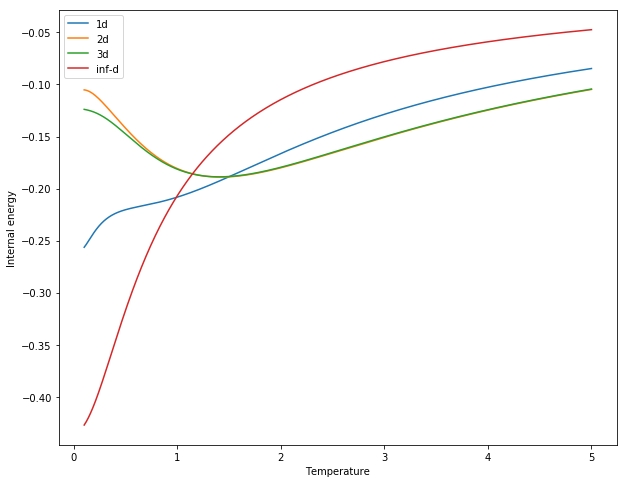

In [739]:
plt.figure(figsize = (10, 8))
plt.ylabel('Internal energy')
plt.xlabel('Temperature')
#plt.ylim(-0.1, 1.2)
plt.plot(temp, itn1d(temp), label = '1d')
plt.plot(temp, itn2d(temp), label = '2d')
plt.plot(temp, itn3d(temp), label = '3d')
plt.plot(temp, itninfd(temp), label = 'inf-d')
plt.legend()
plt.show()

In [740]:
def ent1d(T):
    e = np.linspace(-0.95,0.95,num)
    integral_value = 0.0
    startpoint = -0.95
    endpoint = 0.95
    interval = (endpoint - startpoint) / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += -2 * interval * d1[i] * (log(1/(1+exp((e[i]-mu1dlist[i])/T)))/(1+exp((e[i]-mu1dlist[i])/T)) + 
                                                   (1-1/(1+exp((e[i]-mu1dlist[i])/T))) * log(1-1/(1+exp((e[i]-mu1dlist[i])/T))))
        midpoint += interval
    return 2.0 * integral_value

def ent2d(T):
    e = np.linspace(-2.0,2.0,num)
    integral_value = 0.0
    startpoint = -2.0
    endpoint = 2.0
    interval = (endpoint - startpoint) / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += -2 * interval * d2[i] * (log(1/(1+exp((e[i]-mu2dlist[i])/T)))/(1+exp((e[i]-mu2dlist[i])/T)) + 
                                                   (1-1/(1+exp((e[i]-mu2dlist[i])/T))) * log(1-1/(1+exp((e[i]-mu2dlist[i])/T))))
        midpoint += interval
    return 2.0 * integral_value

def ent3d(T):
    e = np.linspace(-2.0,2.0,num)
    integral_value = 0.0
    startpoint = -2.0
    endpoint = 2.0
    interval = (endpoint - startpoint) / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += -2 * interval * d3[i] * (log(1/(1+exp((e[i]-mu3dlist[i])/T)))/(1+exp((e[i]-mu3dlist[i])/T)) + 
                                                   (1-1/(1+exp((e[i]-mu3dlist[i])/T))) * log(1-1/(1+exp((e[i]-mu3dlist[i])/T))))
        midpoint += interval
    return 2.0 * integral_value

def entinfd(T):
    e = np.linspace(-2.0,2.0,num)
    integral_value = 0.0
    startpoint = -2.0
    endpoint = 2.0
    interval = (endpoint - startpoint) / num
    midpoint = startpoint + 0.5 * interval
    for i in range(num):
        integral_value += -2 * interval * dinf[i] * (log(1/(1+exp((e[i]-muinfdlist[i])/T)))/(1+exp((e[i]-muinfdlist[i])/T)) + 
                                                   (1-1/(1+exp((e[i]-muinfdlist[i])/T))) * log(1-1/(1+exp((e[i]-muinfdlist[i])/T))))
        midpoint += interval
    return 2.0 * integral_value

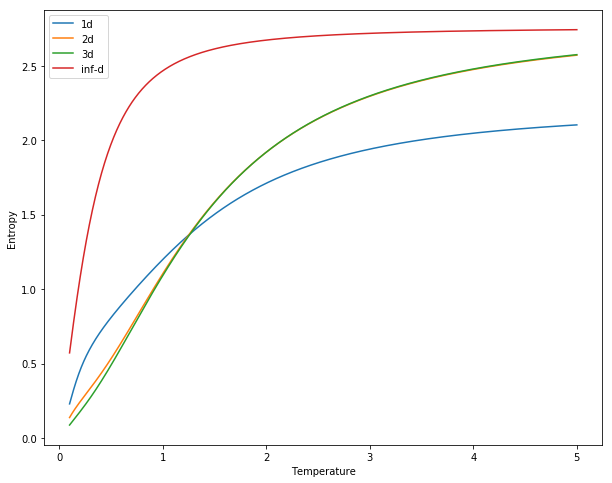

In [741]:
plt.figure(figsize = (10, 8))
plt.ylabel('Entropy')
plt.xlabel('Temperature')
#plt.ylim(-0.1, 1.2)
plt.plot(temp, ent1d(temp), label = '1d')
plt.plot(temp, ent2d(temp), label = '2d')
plt.plot(temp, ent3d(temp), label = '3d')
plt.plot(temp, entinfd(temp), label = 'inf-d')
plt.legend()
plt.show()

In [742]:
def free1d(T):
    return itn1d(T) - T * ent1d(T)
def free2d(T):
    return itn2d(T) - T * ent2d(T)
def free3d(T):
    return itn3d(T) - T * ent3d(T)
def freeinfd(T):
    return itninfd(T) - T * entinfd(T)

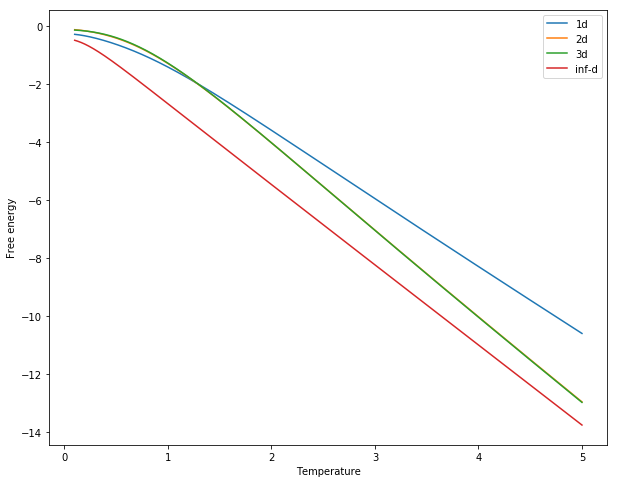

In [743]:
plt.figure(figsize = (10, 8))
plt.ylabel('Free energy')
plt.xlabel('Temperature')
#plt.ylim(-0.1, 1.2)
plt.plot(temp, free1d(temp), label = '1d')
plt.plot(temp, free2d(temp), label = '2d')
plt.plot(temp, free3d(temp), label = '3d')
plt.plot(temp, freeinfd(temp), label = 'inf-d')
plt.legend()
plt.show()

In [744]:
temp = np.linspace(0.1,5,num)
new_temp = np.delete(temp, -1)

In [747]:
itn1dlist = itn1d(temp)
itn2dlist = itn2d(temp)
itn3dlist = itn3d(temp)
itninfdlist = itninfd(temp)
cv1d = []
cv2d = []
cv3d = []
cvinfd = []

for i in range(num-1):
    cv1d.append((itn1dlist[i+1] - itn1dlist[i]) / 0.0049)
    cv2d.append((itn2dlist[i+1] - itn2dlist[i]) / 0.0049)
    cv3d.append((itn3dlist[i+1] - itn3dlist[i]) / 0.0049)
    cvinfd.append((itninfdlist[i+1] - itninfdlist[i]) / 0.0049)

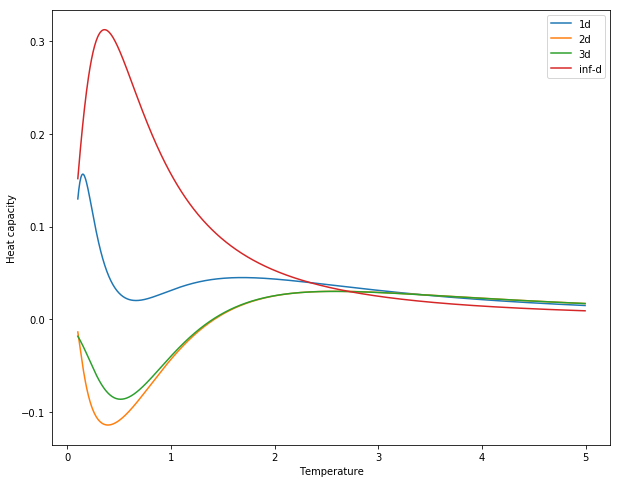

In [748]:
plt.figure(figsize = (10, 8))
plt.ylabel('Heat capacity')
plt.xlabel('Temperature')
#plt.ylim(-0.1, 1.2)
plt.plot(new_temp, cv1d, label = '1d')
plt.plot(new_temp, cv2d, label = '2d')
plt.plot(new_temp, cv3d, label = '3d')
plt.plot(new_temp, cvinfd, label = 'inf-d')
plt.legend()
plt.show()

In [749]:
free1dlist = free1d(temp)
free2dlist = free2d(temp)
free3dlist = free3d(temp)
freeinfdlist = freeinfd(temp)

In [750]:
s1d = []
s2d = []
s3d = []
sinfd = []
for i in range(num-1):
    s1d.append((free1dlist[i+1] - free1dlist[i]) / 0.0049)
    s2d.append((free2dlist[i+1] - free2dlist[i]) / 0.0049)
    s3d.append((free3dlist[i+1] - free3dlist[i]) / 0.0049)
    sinfd.append((freeinfdlist[i+1] - freeinfdlist[i]) / 0.0049)

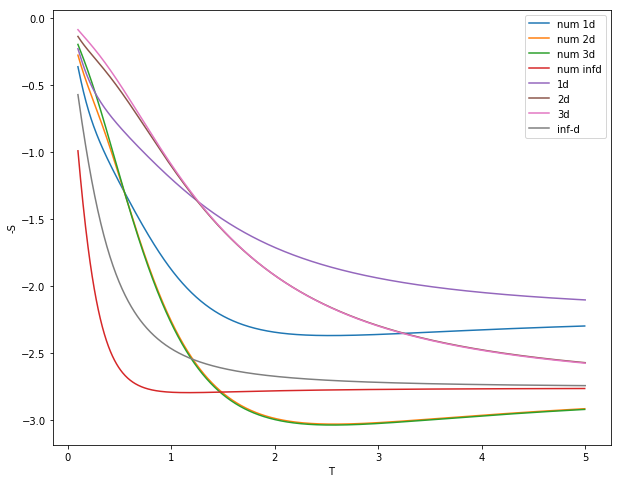

In [751]:

plt.figure(figsize = (10, 8))
plt.ylabel('-S')
plt.xlabel('T')
#plt.ylim(-0.1, 1.2)
plt.plot(new_temp, s1d, label = 'num 1d')
plt.plot(new_temp, s2d, label = 'num 2d')
plt.plot(new_temp, s3d, label = 'num 3d')
plt.plot(new_temp, sinfd, label = 'num infd')
plt.plot(temp, -1*ent1d(temp), label = '1d')
plt.plot(temp, -1*ent2d(temp), label = '2d')
plt.plot(temp, -1*ent3d(temp), label = '3d')
plt.plot(temp, -1*entinfd(temp), label = 'inf-d')
plt.legend()
plt.show()